In [383]:
from pyalex import (
    Works, Authors, Sources,
    Institutions, Concepts, Publishers, Funders
)
import pyalex
import pandas as pd
import numpy as np
pyalex.config.email = "david@rs21.io"

from flair.embeddings import DocumentPoolEmbeddings
from flair.data import Sentence
from flair.embeddings import SentenceTransformerDocumentEmbeddings

EMBEDDING_MODEL_1 = "all-mpnet-base-v2" 

# this one is also good: all-MiniLM-L6-v2
EMBEDDING_MODEL_2 = "all-MiniLM-L6-v2"
SENT_EMBEDDINGS_1 = SentenceTransformerDocumentEmbeddings(EMBEDDING_MODEL_1)
SENT_EMBEDDINGS_2 = SentenceTransformerDocumentEmbeddings(EMBEDDING_MODEL_2)
DOC_EMBEDDINGS= DocumentPoolEmbeddings([SENT_EMBEDDINGS_2])

import torch
from tqdm import tqdm
import yake
import umap.umap_ as umap
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
import altair as alt
import math
import plotly.express as px
import textwrap

In [384]:
search_term = 'missile'
robot_concepts = Concepts().search_filter(display_name=search_term).get()
len(robot_concepts)
for i in range(len(robot_concepts)):
    id_, display_name = robot_concepts[i]['id'], robot_concepts[i]['display_name']
    print(id_, display_name)
#places_search_term = ('Zhengzhou University of Aeronautics|Nanjing University of Aeronautics and Astronautics|' +  
#              'North China Institute of Science and Technology|' + 
#              'North China Institute of Aerospace Engineering|'  + 
#              'North China Research Institute of Electro-optics|' + 
#              'Shenyang Aerospace University|' + 
#              'Space Engineering University|' + 
#              'China Aerospace Science and Industry Corporation (China)|' +  
#              'China Aerospace Science and Technology Corporation|' +
#              'PLA Army Engineering University') 
    

https://openalex.org/C2778857364 Missile
https://openalex.org/C522053795 Missile guidance
https://openalex.org/C122136912 Ballistic missile
https://openalex.org/C559253537 Missile defense
https://openalex.org/C28849524 Cruise missile
https://openalex.org/C202802212 Air-to-air missile


In [385]:
results, meta  = Concepts().get(return_meta=True)
print(meta)

{'count': 65073, 'db_response_time_ms': 49, 'page': 1, 'per_page': 25}


In [386]:
#concepts_pager = Concepts().paginate(per_page=200)
   

In [387]:
search_term = 'jamming'
search_term = 'radar jamming and deception|electronic warfare|Network-centric warfare|Air-to-air missile'
search_term = ('radar jamming and deception|electronic warfare|Network-centric warfare|missile guidance' +
               '|Robot manipulator|Automatic target recognition' + 
              '|Pulsed power|High-energy X-rays' + 
              '|Ballistic missile|Air-to-air missile' + 
              '|terminal guidance')
jamming_concepts = Concepts().\
search_filter(display_name=search_term).get()

In [388]:
concepts = []
for i in range(len(jamming_concepts)):
    id_, display_name = jamming_concepts[i]['id'], jamming_concepts[i]['display_name']
    concepts.append((id_, display_name))
concepts

[('https://openalex.org/C2985527887', 'Robot manipulator'),
 ('https://openalex.org/C97039730', 'Pulsed power'),
 ('https://openalex.org/C522053795', 'Missile guidance'),
 ('https://openalex.org/C117623542', 'Automatic target recognition'),
 ('https://openalex.org/C122136912', 'Ballistic missile'),
 ('https://openalex.org/C183838350', 'High-energy X-rays'),
 ('https://openalex.org/C176381164', 'Radar jamming and deception'),
 ('https://openalex.org/C133082901', 'Electronic warfare'),
 ('https://openalex.org/C2777047555', 'Terminal guidance'),
 ('https://openalex.org/C2781187084', 'Network-centric warfare'),
 ('https://openalex.org/C202802212', 'Air-to-air missile')]

In [389]:
def process_works_list(worklist:list):
    """
    transforms the 
    works list into a dataframe.
    """
    abstracts_dict = {h["id"]:h["abstract"] for h in worklist}
    df = pd.DataFrame.from_records(worklist)
    del df['abstract_inverted_index']
    df['abstract'] = df['id'].map(abstracts_dict)
   # df['author_affils'] = df['authorships'].apply(get_authors_and_affils)
    return df

In [390]:
for i in range(len(jamming_concepts)):
    print(jamming_concepts[i]['id'], jamming_concepts[i]['works_count'])

https://openalex.org/C2985527887 9987
https://openalex.org/C97039730 13191
https://openalex.org/C522053795 6157
https://openalex.org/C117623542 3284
https://openalex.org/C122136912 6015
https://openalex.org/C183838350 1131
https://openalex.org/C176381164 2571
https://openalex.org/C133082901 3218
https://openalex.org/C2777047555 1353
https://openalex.org/C2781187084 1794
https://openalex.org/C202802212 1326


In [391]:
#len(Works().filter(publication_year='>2015').search("space based laser").\
#filter(authorships={"institutions":{"country_code":"CN"}}).get())

In [392]:
def get_hpm_frame():
    #hpm_pager = Works().filter(publication_year='>2020').search("high power microwave").\
#filter(authorships={"institutions":{"country_code":"CN"}}).paginate(per_page=200,
#                                                                    n_max=None)
    hpm_pager = Works().filter(publication_year='>2020').search("high power microwave").\
        paginate(per_page=200,  n_max=None)
    df = pd.DataFrame()
    for page in tqdm(hpm_pager):
        dfpage = process_works_list(page)
        df = pd.concat([df, dfpage], ignore_index=True)
        df.drop_duplicates(subset='id', keep='first',inplace=True)
    return df                                                               
    
#print(de)

In [393]:
def get_sbl_frame():
    #sbl_pager = Works().filter(publication_year='>2020').search("space based laser").\
#filter(authorships={"institutions":{"country_code":"CN"}}).paginate(per_page=200,
#                                                                    n_max=None)
    sbl_pager = Works().filter(publication_year='>2020').search("space based laser").\
        paginate(per_page=200,
                                                                    n_max=None)
    df = pd.DataFrame()
    for page in tqdm(sbl_pager):
        dfpage = process_works_list(page)
        df = pd.concat([df, dfpage], ignore_index=True)
        df.drop_duplicates(subset='id', keep='first',inplace=True)
    return df                                                               
    
#print(de)

In [394]:
def get_kkv_frame():
    #kkv_pager = Works().filter(publication_year='>2020').search("kinetic kill vehicle").\
#filter(authorships={"institutions":{"country_code":"CN"}}).paginate(per_page=200,
#                                                                    n_max=None)
    kkv_pager = Works().filter(publication_year='>2020').search("kinetic kill vehicle").\
        paginate(per_page=200,
                                                                    n_max=None)
    df = pd.DataFrame()
    for page in tqdm(kkv_pager):
        dfpage = process_works_list(page)
        df = pd.concat([df, dfpage], ignore_index=True)
        df.drop_duplicates(subset='id', keep='first',inplace=True)
    return df                                                               
    

In [395]:
def get_rka_frame():
   # rka_pager = Works().filter(publication_year='>2020').search("relativistic klystron amplifier").\
#filter(authorships={"institutions":{"country_code":"CN"}}).paginate(per_page=200,
#                                                                    n_max=None)
    rka_pager = Works().filter(publication_year='>2020').search("relativistic klystron amplifier").\
        paginate(per_page=200,
                                                                    n_max=None)
    df = pd.DataFrame()
    for page in tqdm(rka_pager):
        dfpage = process_works_list(page)
        df = pd.concat([df, dfpage], ignore_index=True)
        df.drop_duplicates(subset='id', keep='first',inplace=True)
    return df 

In [396]:
def get_concept_frame(concepts_list:list, i:int):
    """
    takes a list of Concepts() results and an index
    and forms the pagination object to retrive the 
    records
    """
    pager = Works().filter(publication_year='>2016',
    #concepts={"id":f"{concepts_list[i]['id']}"}).filter(authorships={"institutions":{"country_code":"CN"}}).\
    #paginate(per_page=200,n_max=None)
    concepts={"id":f"{concepts_list[i]['id']}"}).\
    paginate(per_page=200,n_max=None)
    df = pd.DataFrame()
    for page in tqdm(pager):
        dfpage = process_works_list(page)
        df = pd.concat([df, dfpage], ignore_index=True)
        df.drop_duplicates(subset='id', keep='first',inplace=True)
    return df

In [397]:
frames_list = []
for i in range(len(jamming_concepts)):
    df = get_concept_frame(jamming_concepts, i)
    frames_list.append(df)

12it [00:17,  1.43s/it]
13it [00:19,  1.52s/it]
6it [00:08,  1.38s/it]
6it [00:10,  1.75s/it]
5it [00:07,  1.45s/it]
1it [00:01,  1.61s/it]
4it [00:05,  1.49s/it]
4it [00:05,  1.44s/it]
2it [00:03,  1.52s/it]
2it [00:02,  1.05s/it]
1it [00:01,  1.41s/it]


```python
asat_places = Institutions().search_filter(display_name=places_search_term).get()
places = []
for i in range(len(asat_places)):
    id_, display_name, works_count = (asat_places[i]['id'],
    asat_places[i]['display_name'], asat_places[i]['works_count'])
    places.append((id_, display_name, works_count))

def get_place_frame(inst_list:list, i:int):
    """
    takes a list of Concepts() results and an index
    and forms the pagination object to retrive the 
    records
    """
    pager = Works().filter(publication_year='>2018',
    authorships={"institutions": {"id":f"{inst_list[i]['id']}"}}).\
    paginate(per_page=200,n_max=inst_list[i]['works_count'])
    df = pd.DataFrame()
    for page in tqdm(pager):
        dfpage = process_works_list(page)
        df = pd.concat([df, dfpage], ignore_index=True)
        df.drop_duplicates(subset='id', keep='first',inplace=True)
    return df
```

In [398]:
len(frames_list)

11

In [399]:
#for i in range(len(asat_places)):
#    df = get_place_frame(asat_places, i)
#    frames_list.append(df)

In [400]:
#dfrka = get_rka_frame()

In [401]:
#dfhpm = get_hpm_frame()
#dfsbl = get_sbl_frame()

In [402]:
#frames_list.append(dfsbl)
#frames_list.append(dfrka)

In [403]:
dftop = pd.concat(frames_list,
                  ignore_index=True)
dftop.drop_duplicates(subset='id', keep='first', 
                      inplace=True)

dftop.set_index('id', inplace=True, drop=False)

dfall = dftop
print(dfall.shape)

dfall['content'] = dfall['title'] + ". " + dfall['abstract']

dfrecords = dfall[~dfall['content'].isna()].copy()

(9456, 39)


In [404]:
def get_keywords(text:str, top:int=7, stopwords=None):
    """
    takes a blob of text and 
    returns the top **top** 
    keywords as a list
    """
    kw_extractor = yake.KeywordExtractor(top=top, stopwords=stopwords)
    keywords = kw_extractor.extract_keywords(text)
    return [p[0] for p in keywords]

In [405]:
def get_top_concepts(concept_list:list,score:float=.6):
    """
    takes a list of concept dictionaries 
    returns the top **top** display_names;
    concepts whose score is >= score
    """
    return [c['display_name'] for c in concept_list if c['score'] >= score]

In [406]:
dfrecords['keywords'] = dfrecords['content'].apply(get_keywords)
dfrecords['top_concepts'] = dfrecords['concepts'].apply(get_top_concepts)

In [407]:
texts = dfrecords['content'].str.lower().values.tolist()
#dfrecords.to_csv('jamming.csv')

In [408]:
def get_content_embeddings(dfrecords:pd.DataFrame) -> pd.DataFrame:
    """
    passes the preprocessed mitigation strings
    data through the embedding model to produce the vector
    space representation of each pet mitigation.
    """
    sent = Sentence("The grass is green.")
    DOC_EMBEDDINGS.embed(sent)
    texts = dfrecords["content"].str.lower().values.tolist()
    all_descriptions = np.empty((len(texts), len(sent.embedding)))
    for i in tqdm(range(len(texts))):
        sent = Sentence(texts[i])
        DOC_EMBEDDINGS.embed(sent)
        all_descriptions[i, :] = sent.embedding.cpu().numpy()
        # gc.collect()
        torch.cuda.empty_cache()
    dfcontentvectors = pd.DataFrame.from_records(all_descriptions, index=dfrecords.index)
    return dfcontentvectors

In [409]:
dfcontentvectors = get_content_embeddings(dfrecords)

100%|█████████████████████████████████████████████████████████████████████| 7760/7760 [01:39<00:00, 77.70it/s]


In [410]:
#umap.UMAP?
N_COMPONENTS = 2 # can visualize this way
umap_reducer = umap.UMAP(n_components=N_COMPONENTS,
                       #  metric='euclidean')
                         random_state=1234,
                         metric='cosine')  # can experiment with this metric as well as the other 
# parameters
# to see what other literature is in the same information space, we need to keep this umap_reducer 
# object as well as the gmm model below.

# Apply UMAP to the vectorized strings
reduced_vectors = umap_reducer.fit_transform(dfcontentvectors.to_numpy())
dfreduced = pd.DataFrame.from_records(reduced_vectors, 
                index=dfcontentvectors.index)
dfreduced.columns = ['x','y']

## use hdbscan to cluster

In [411]:
import hdbscan

hdbscan_args = {'min_cluster_size': 10,
                            'metric': 'euclidean',
                            'cluster_selection_method': 'eom',
                            'cluster_selection_epsilon': 0.1
               }

cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(dfreduced[['x','y']].to_numpy())

dfreduced['cluster'] = cluster.labels_
dfreduced['probability'] = cluster.probabilities_

dfpapers = dfrecords.merge(dfreduced, left_index=True,
                           right_index=True)

In [412]:
#help(dfpapers.explode)
del dfpapers['id']
dfstart = dfpapers.reset_index()
dfstart.head()

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,created_date,abstract,is_authors_truncated,content,keywords,top_concepts,x,y,cluster,probability
0,https://openalex.org/W1517236425,https://doi.org/10.1201/9781003062714,Neural Network Control Of Robot Manipulators A...,Neural Network Control Of Robot Manipulators A...,2020,2020-08-13,{'openalex': 'https://openalex.org/W1517236425...,en,"{'is_oa': False, 'landing_page_url': 'https://...",book,...,2016-06-24,"There has been great interest in ""universal co...",NaN,Neural Network Control Of Robot Manipulators A...,"[Robot Manipulators, Neural network controller...","[Robot manipulator, Artificial neural network]",7.990042,-4.013310,-1,0.000000
1,https://openalex.org/W2787504052,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,Adaptive Parameter Estimation and Control Desi...,2018,2018-10-01,{'openalex': 'https://openalex.org/W2787504052...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,2018-02-23,For parameter identifications of robot systems...,NaN,Adaptive Parameter Estimation and Control Desi...,"[Adaptive Parameter Estimation, Control Design...","[Convergence (economics), Control theory (soci...",8.085600,-4.827379,81,0.656692
2,https://openalex.org/W2591194352,https://doi.org/10.1109/tie.2017.2674624,Manipulability Optimization of Redundant Manip...,Manipulability Optimization of Redundant Manip...,2017,2017-06-01,{'openalex': 'https://openalex.org/W2591194352...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,2017-03-03,For solving the singularity problem arising in...,NaN,Manipulability Optimization of Redundant Manip...,"[dynamic neural network, Manipulability Optimi...",[],8.405093,-3.737547,70,0.871791
3,https://openalex.org/W2418767125,https://doi.org/10.1109/tsmc.2016.2562506,Neural Network Control of a Flexible Robotic M...,Neural Network Control of a Flexible Robotic M...,2017,2017-08-01,{'openalex': 'https://openalex.org/W2418767125...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,2016-06-24,Adaptive neural networks (NNs) are employed fo...,NaN,Neural Network Control of a Flexible Robotic M...,"[Flexible Robotic Manipulator, Flexible Roboti...",[Spring (device)],7.928548,-4.222818,-1,0.000000
4,https://openalex.org/W2740675802,https://doi.org/10.1109/tcyb.2017.2711961,Adaptive Neural Network Control of a Robotic M...,Adaptive Neural Network Control of a Robotic M...,2017,2017-10-01,{'openalex': 'https://openalex.org/W2740675802...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,...,2017-08-08,The control problem of an uncertain n -degrees...,NaN,Adaptive Neural Network Control of a Robotic M...,"[Time-Varying Output Constraints, Output Const...","[Control theory (sociology), Lyapunov function...",7.601338,-4.180836,75,1.000000


In [413]:
dfstart.shape

(7760, 46)

In [414]:
dfbig = dfstart.explode(column='authorships')
dfbig.shape, dfstart.shape

((31045, 46), (7760, 46))

In [415]:
dfbig.columns

Index(['id', 'doi', 'title', 'display_name', 'publication_year',
       'publication_date', 'ids', 'language', 'primary_location', 'type',
       'type_crossref', 'open_access', 'authorships',
       'institutions_distinct_count', 'corresponding_author_ids',
       'corresponding_institution_ids', 'apc_list', 'apc_paid',
       'cited_by_count', 'biblio', 'is_retracted', 'is_paratext', 'concepts',
       'mesh', 'locations_count', 'locations', 'best_oa_location',
       'sustainable_development_goals', 'grants', 'referenced_works_count',
       'referenced_works', 'related_works', 'ngrams_url', 'cited_by_api_url',
       'counts_by_year', 'updated_date', 'created_date', 'abstract',
       'is_authors_truncated', 'content', 'keywords', 'top_concepts', 'x', 'y',
       'cluster', 'probability'],
      dtype='object')

In [416]:
dfbig.locations.iloc[68]

[{'is_oa': False,
  'landing_page_url': 'https://doi.org/10.1109/tmech.2017.2683561',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S13961689',
   'display_name': 'IEEE-ASME Transactions on Mechatronics',
   'issn_l': '1083-4435',
   'issn': ['1941-014X', '1083-4435'],
   'is_oa': False,
   'is_in_doaj': False,
   'host_organization': 'https://openalex.org/P4310319808',
   'host_organization_name': 'Institute of Electrical and Electronics Engineers',
   'host_organization_lineage': ['https://openalex.org/P4310319808'],
   'host_organization_lineage_names': ['Institute of Electrical and Electronics Engineers'],
   'type': 'journal'},
  'license': None,
  'version': None,
  'is_accepted': False,
  'is_published': False}]

In [417]:
def add_extra_to_authorships(row: pd.DataFrame):
    """
    row[authorships] is a dictionary;
    add in the id key to that dictionary
    whose value is row[id]
    """
    complete_dict = row["authorships"]
   # assert type(complete_dict) == dict
    #print(type(complete_dict))
    if type(complete_dict) == dict:
        complete_dict["id"] = row["id"]
        complete_dict["x"] = row["x"]
        complete_dict["y"] = row["y"]
        complete_dict["cluster"] = row["cluster"]
        complete_dict["cluster_score"] = row["probability"]
        complete_dict["title"] = row["title"]
        complete_dict["abstract"] = row["abstract"]
        complete_dict["doi"] = row["doi"]
        complete_dict["publication_date"] = row["publication_date"]
        complete_dict["publication_year"] = row["publication_year"]
        complete_dict["grants"] = row["grants"]
        complete_dict["locations"] = row["locations"]
        return complete_dict
    else:
        return row["authorships"]

In [418]:
dfbig['big_authorships'] = dfbig.apply(add_extra_to_authorships, axis=1)

In [419]:
#dfbig['authorships'].tolist()
bigvals = dfbig['authorships'].tolist()

In [420]:
dictvals = [c for c in bigvals if type(c) != float]

In [421]:
dftriple = pd.json_normalize(dictvals,
                  record_path=['institutions'],
                  meta=['id','raw_affiliation_string','author_position', 'doi',
                        'title','abstract','publication_date', 'publication_year',
                        'grants','locations',
                        'is_corrresponding','x','y','cluster','cluster_score',
                       ['author','id'], ['author', 'display_name'],
                       ['author','orcid']],
                  errors='ignore',
                  sep='_',
                  meta_prefix='paper_',
                #  record_prefix='author_'
                 )

In [422]:
dftopics = dfcontentvectors.copy()
dftopics['cluster'] = dfpapers['cluster']
dfmeantopics = dftopics.groupby('cluster').mean().copy()
reduced_topics = umap_reducer.transform(dfmeantopics.to_numpy())
df_reduced_topics = pd.DataFrame.from_records(reduced_topics, 
                index=dfmeantopics.index)
df_reduced_topics.columns = ['x','y']
df_reduced_topics['topic'] = df_reduced_topics.index
df_reduced_topics.head()

def get_cluster_concepts(topic_num:int, n:int=20):
    """
    takes an integer topic_num corresponding to a 
    given topic number and
    returns the list of top n occuring concepts
    from the top_concept field
    """
    top_concepts = dfpapers[dfpapers['cluster'] == topic_num]['top_concepts'].tolist()
    flat_concepts = [item for sublist in top_concepts for item in sublist]
    concepts_dict = {c:flat_concepts.count(c) for c in flat_concepts}
    sorted_concepts = sorted(concepts_dict.items(), key=lambda x:x[1], reverse=True)
    return [c[0] for c in sorted_concepts][:n]

def get_yake_cluster_phrases(topic_num:int, n:int=20):
    """
    takes in an integer n corresponding
    to a given topic number and
    returns the list of keyphrases (TopicRank method)
    """
    documents = dfpapers[dfpapers['cluster'] == topic_num]['content'].tolist()
    topic_input = ". ".join(documents)
    #extractor = pke.unsupervised.TextRank()
    kw_extractor = yake.KeywordExtractor(top=n, stopwords=None)
    keywords = kw_extractor.extract_keywords(topic_input)
    #extractor.load_document(input=topic_input,
    #                    language='en',
    #                    normalization=None)

    #extractor.candidate_selection()

    #window = 2
    #use_stems = False
    #extractor.candidate_weighting(window=window,
    #                          use_stems=use_stems)
    #extractor.candidate_weighting()
    #threshold = 0.8
   # keyphrases = extractor.get_n_best(n=20, threshold=threshold)
    #keyphrases = extractor.get_n_best(n=n)
    return [p[0] for p in keywords]

wikiconcepts = df_reduced_topics['topic'].apply(get_cluster_concepts)

wikikeywords = df_reduced_topics['topic'].apply(get_yake_cluster_phrases)

dfpapers['id'] = dfpapers.index
dfinfo = dfpapers[['x','y','id','title','doi','cluster','grants',
                   'locations',
                 'publication_date','keywords','top_concepts']].copy()

centroids = dfinfo.groupby('cluster')[['x','y']].mean().copy()
centroids['concepts'] = wikiconcepts
centroids['cluster'] = centroids.index
centroids['keywords'] = wikikeywords

In [423]:
def wrap_it(x):
    return "<br>".join(textwrap.wrap(x, width=40))
   # return "<br>".join(textwrap.wrap(x.replace(r'\s+', ' '), width=40))


In [424]:
centroids['wrapped_keywords'] = centroids['keywords'].apply(str).apply(wrap_it)
centroids['wrapped_concepts'] = centroids['concepts'].apply(str).apply(wrap_it)

In [425]:
centroids.to_pickle('jammingcentroids2d.pkl')

In [426]:
dftriple.to_pickle('jammingdftriple2d.pkl')

In [427]:
def get_affils_cluster_sort(dc:pd.DataFrame, cl:int):
    """
    restricts the dataframe dc to cluster value cl
    and returns the results grouped by id, ror sorted
    by the some of probablity descending
    """
    dg = dc[dc['paper_cluster'] == cl].copy()
    print(cl)
    dv = dg.groupby(['id','display_name','country_code',
                     'type'])['paper_cluster_score'].sum().to_frame()
    dv.sort_values('paper_cluster_score', ascending=False, inplace=True)
    kw = centroids[centroids.cluster == cl]['keywords'].iloc[0]
    return dv, kw

In [428]:
dv84, kw84 = get_affils_cluster_sort(dftriple, 1)
print(kw84)
dv84.head(10)

1
['Aerial Manipulator', 'Aerial Robotic Manipulators', 'Aerial', 'Aerial Manipulator System', 'Manipulator', 'Aerial Manipulator Robot', 'robotic manipulator', 'unmanned aerial vehicle', 'Aerial Robotic', 'Control Aerial Manipulator', 'aerial manipulator control', 'Protocentric Aerial Manipulators', 'aerial manipulator vehicle', 'control', 'proposed aerial manipulator', 'unmanned aerial', 'Aerial Continuum Manipulator', 'cable-Suspended Aerial Manipulator', 'aerial vehicle', 'Aerial Manipulator Dynamics']


,,,,paper_cluster_score
id,display_name,country_code,type,
https://openalex.org/I118946981,Escuela Politécnica del Ejército,EC,education,8.0
https://openalex.org/I94624287,University of Twente,NL,education,7.979617
https://openalex.org/I17866349,Federal University of Toulouse Midi-Pyrénées,FR,education,7.636175
https://openalex.org/I79238269,University of Seville,ES,education,7.385489
https://openalex.org/I82880672,Beihang University,CN,education,4.669074
https://openalex.org/I2801509770,Institut National des Sciences Appliquées de Strasbourg,FR,education,4.380579
https://openalex.org/I68947357,University of Strasbourg,FR,education,4.380579
https://openalex.org/I47508984,Imperial College London,GB,education,3.681518
https://openalex.org/I125839683,Beijing Institute of Technology,CN,education,3.261795


In [429]:
dv84, kw84 = get_affils_cluster_sort(dftriple, 0)
print(kw84)
dv84.head(10)

0
['energy storage density', 'energy storage', 'energy storage performance', 'high energy storage', 'energy storage properties', 'high power density', 'recoverable energy storage', 'energy density', 'excellent energy storage', 'discharge energy density', 'energy storage ceramics', 'energy', 'storage density', 'High energy density', 'power density', 'recoverable energy density', 'energy storage efficiency', 'dielectric energy storage', 'high energy', 'storage']


,,,,paper_cluster_score
id,display_name,country_code,type,
https://openalex.org/I87445476,Xi'an Jiaotong University,CN,education,45.717107
https://openalex.org/I38706770,Guilin University of Technology,CN,education,36.178336
https://openalex.org/I150229711,University of Electronic Science and Technology of China,CN,education,30.078372
https://openalex.org/I139024713,Guangdong University of Technology,CN,education,29.928186
https://openalex.org/I4210124847,National Engineering Research Center of Electromagnetic Radiation Control Materials,CN,facility,29.078372
https://openalex.org/I109935558,Ningbo University,CN,education,24.063924
https://openalex.org/I1297991670,Southwest University of Science and Technology,CN,education,23.142364
https://openalex.org/I51622183,Shaanxi University of Science and Technology,CN,education,23.0
https://openalex.org/I88830068,Shaanxi Normal University,CN,education,22.616514


In [430]:
dv84, kw84 = get_affils_cluster_sort(dftriple, 0)
print(kw84)
dv84.head(20)

0
['energy storage density', 'energy storage', 'energy storage performance', 'high energy storage', 'energy storage properties', 'high power density', 'recoverable energy storage', 'energy density', 'excellent energy storage', 'discharge energy density', 'energy storage ceramics', 'energy', 'storage density', 'High energy density', 'power density', 'recoverable energy density', 'energy storage efficiency', 'dielectric energy storage', 'high energy', 'storage']


,,,,paper_cluster_score
id,display_name,country_code,type,
https://openalex.org/I87445476,Xi'an Jiaotong University,CN,education,45.717107
https://openalex.org/I38706770,Guilin University of Technology,CN,education,36.178336
https://openalex.org/I150229711,University of Electronic Science and Technology of China,CN,education,30.078372
https://openalex.org/I139024713,Guangdong University of Technology,CN,education,29.928186
https://openalex.org/I4210124847,National Engineering Research Center of Electromagnetic Radiation Control Materials,CN,facility,29.078372
https://openalex.org/I109935558,Ningbo University,CN,education,24.063924
https://openalex.org/I1297991670,Southwest University of Science and Technology,CN,education,23.142364
https://openalex.org/I51622183,Shaanxi University of Science and Technology,CN,education,23.0
https://openalex.org/I88830068,Shaanxi Normal University,CN,education,22.616514


In [431]:
#dv84, kw84 = get_affils_cluster_sort(dftriple, 3)
#print(kw84)
#dv84.head(20)

In [432]:
#dv84, kw84 = get_affils_cluster_sort(dftriple, 3)
#print(kw84)
#dv84.head(20)

In [433]:
#dv84, kw84 = get_affils_cluster_sort(dftriple, 6)
#print(kw84)
#dv84.head(20)

In [434]:
#dv84, kw84 = get_affils_cluster_sort(dftriple, 12)
#print(kw84)
#dv84.head(20)

In [435]:
dfinfo = dfpapers[['x','y','id','title','doi','cluster','probability',
                 'publication_date','grants','locations',
                   'keywords','top_concepts']].copy()

In [436]:
dfpapers['primary_location'].iloc[58]

{'is_oa': False,
 'landing_page_url': 'https://doi.org/10.1109/tcst.2017.2756029',
 'pdf_url': None,
 'source': {'id': 'https://openalex.org/S133363738',
  'display_name': 'IEEE Transactions on Control Systems and Technology',
  'issn_l': '1063-6536',
  'issn': ['1558-0865', '2374-0159', '1063-6536'],
  'is_oa': False,
  'is_in_doaj': False,
  'host_organization': 'https://openalex.org/P4310319808',
  'host_organization_name': 'Institute of Electrical and Electronics Engineers',
  'host_organization_lineage': ['https://openalex.org/P4310319808'],
  'host_organization_lineage_names': ['Institute of Electrical and Electronics Engineers'],
  'type': 'journal'},
 'license': None,
 'version': None,
 'is_accepted': False,
 'is_published': False}

In [437]:
dfpapers['locations'].iloc[58]

[{'is_oa': False,
  'landing_page_url': 'https://doi.org/10.1109/tcst.2017.2756029',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S133363738',
   'display_name': 'IEEE Transactions on Control Systems and Technology',
   'issn_l': '1063-6536',
   'issn': ['1558-0865', '2374-0159', '1063-6536'],
   'is_oa': False,
   'is_in_doaj': False,
   'host_organization': 'https://openalex.org/P4310319808',
   'host_organization_name': 'Institute of Electrical and Electronics Engineers',
   'host_organization_lineage': ['https://openalex.org/P4310319808'],
   'host_organization_lineage_names': ['Institute of Electrical and Electronics Engineers'],
   'type': 'journal'},
  'license': None,
  'version': None,
  'is_accepted': False,
  'is_published': False}]

In [438]:
pap_affils_dict = dftriple.groupby('paper_id')['paper_raw_affiliation_string'].\
apply(lambda x: ' | '.join(x.tolist()))

#pap_authors_dict = dftriple.groupby('paper_id')['paper_author_display_name'].\
#apply(lambda x: ' | '.join(x.tolist()))

In [439]:
pap_authors_dict = dftriple.groupby('paper_id')['paper_author_display_name'].apply(lambda x: x.values)


In [440]:
dfinfo['affil_list'] = pap_affils_dict
dfinfo['author_list'] = pap_authors_dict

In [441]:
dfinfo['affil_list'] = dftriple.groupby('paper_id')['paper_raw_affiliation_string'].\
apply(lambda x: x.tolist())

In [442]:
dfinfo['author_list'] =  dftriple.groupby('paper_id')['paper_author_display_name'].\
apply(lambda x: x.tolist())


In [443]:
dfinfo['wrapped_affil_list'] = dfinfo['affil_list'].apply(str).apply(wrap_it)
dfinfo['wrapped_author_list'] = dfinfo['author_list'].apply(str).apply(wrap_it)

In [444]:
dfinfo['wrapped_keywords'] = dfinfo['keywords'].apply(str).apply(wrap_it)

In [445]:
dfinfo['locations'].iloc[69]

[{'is_oa': False,
  'landing_page_url': 'https://doi.org/10.1016/j.rcim.2016.08.007',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S118216261',
   'display_name': 'Robotics and Computer-integrated Manufacturing',
   'issn_l': '0736-5845',
   'issn': ['1879-2537', '0736-5845'],
   'is_oa': False,
   'is_in_doaj': False,
   'host_organization': 'https://openalex.org/P4310320990',
   'host_organization_name': 'Elsevier BV',
   'host_organization_lineage': ['https://openalex.org/P4310320990'],
   'host_organization_lineage_names': ['Elsevier BV'],
   'type': 'journal'},
  'license': None,
  'version': None,
  'is_accepted': False,
  'is_published': False}]

In [446]:
def get_source_name(loc_list):
    """
    grab the first item in the list;
    retturn the display name
    """
    try:
        primary = loc_list[0]
        return primary["source"]["display_name"]
    except:
        return None

def get_source_type(loc_list):
    """
    grab the first item in the list;
    return the source type
    """
    try:
        primary = loc_list[0]
        return primary["source"]["type"]
    except:
        return None
    
    

In [447]:
dfinfo["source"] = dfinfo["locations"].apply(get_source_name)
dfinfo["source_type"] = dfinfo["locations"].apply(get_source_type)

In [448]:
dfinfo["source"].value_counts()

source
IEEE Transactions on Plasma Science                                 265
Journal of physics                                                  159
arXiv (Cornell University)                                          159
IEEE Access                                                         131
Review of Scientific Instruments                                    113
                                                                   ... 
Laser Congress 2020 (ASSL, LAC)                                       1
International Journal of Aviation Science and Engineering (AVIA)      1
Proceedings                                                           1
Вісті Донецького гірничого інституту                                  1
Frontiers in space technologies                                       1
Name: count, Length: 1409, dtype: int64

In [449]:
dfinfo["source_type"].value_counts()

source_type
journal           4146
conference         624
book series        294
repository         209
ebook platform     170
Name: count, dtype: int64

In [450]:
dfinfo[dfinfo["source_type"] == "conference"]

,x,y,id,title,doi,cluster,probability,publication_date,grants,locations,keywords,top_concepts,affil_list,author_list,wrapped_affil_list,wrapped_author_list,wrapped_keywords,source,source_type
id,,,,,,,,,,,,,,,,,,,
https://openalex.org/W2763941082,9.348605,-4.051673,https://openalex.org/W2763941082,Real-time collision avoidance algorithm on ind...,https://doi.org/10.1109/ccta.2017.8062637,79,1.000000,2017-08-01,[],"[{'is_oa': False, 'landing_page_url': 'https:/...","[industrial manipulators, collision avoidance,...","[Collision avoidance, Computer science, Collis...","[Department of Mechanical Engineering, Univers...","[Henry Lin, Changliu Liu, Fan Yi, Masayoshi To...","['Department of Mechanical Engineering,<br>Uni...","['Henry Lin', 'Changliu Liu', 'Fan Yi',<br>'Ma...","['industrial manipulators', 'collision<br>avoi...",2017 IEEE Conference on Control Technology and...,conference
https://openalex.org/W2909393507,8.415274,-4.980320,https://openalex.org/W2909393507,Optimal Trajectory Tracking of Robotic Manipul...,https://doi.org/10.1109/upcon.2018.8597087,82,0.757384,2018-11-01,[],"[{'is_oa': False, 'landing_page_url': 'https:/...","[Ant Colony Optimization, Colony Optimization,...","[Ant colony optimization algorithms, Trajector...","[Department of Electrical Engineering, Madan M...","[Ruchi Singh, Lal Bahadur Prasad]","['Department of Electrical Engineering,<br>Mad...","['Ruchi Singh', 'Lal Bahadur Prasad']","['Ant Colony Optimization', 'Colony<br>Optimiz...",2018 5th IEEE Uttar Pradesh Section Internatio...,conference
https://openalex.org/W2927011308,9.471565,-4.861221,https://openalex.org/W2927011308,URDF Generator for Manipulator Robot,https://doi.org/10.1109/irc.2019.00101,80,1.000000,2019-02-01,[],"[{'is_oa': False, 'landing_page_url': 'https:/...","[URDF Generator, robots market grows, Generato...","[Parallel manipulator, Robot, Robot manipulato...","[Department of Eletronics, Kyung Hee Universit...","[Yeon June Kang, Donghan Kim]","['Department of Eletronics, Kyung Hee<br>Unive...","['Yeon June Kang', 'Donghan Kim']","['URDF Generator', 'robots market<br>grows', '...",2019 Third IEEE International Conference on Ro...,conference
https://openalex.org/W3139813835,6.801655,-3.784800,https://openalex.org/W3139813835,Fault-tolerant Control of Robot Manipulators w...,https://doi.org/10.23919/ecc54610.2021.9654913,10,0.515168,2021-06-29,[],"[{'is_oa': False, 'landing_page_url': 'https:/...","[Unbiased Active Inference, Active Inference, ...","[Inference, Fault tolerance]",NaN,NaN,nan,nan,"['Unbiased Active Inference', 'Active<br>Infer...",2021 European Control Conference (ECC),conference
https://openalex.org/W2926121561,9.773699,-4.908061,https://openalex.org/W2926121561,The Kinematics Analysis of Robotic Arm manipul...,https://doi.org/10.1088/1757-899x/494/1/012100,80,1.000000,2019-03-29,[],"[{'is_oa': True, 'landing_page_url': 'https://...","[Cylindrical Robot RPP, Robot RPP Type, Cylind...",[Kinematics],"[Mechanical Engineering Department, Brawijaya ...",[Fikrul Akbar Alamsyah],"['Mechanical Engineering Department,<br>Brawij...",['Fikrul Akbar Alamsyah'],"['Cylindrical Robot RPP', 'Robot RPP<br>Type',...",IOP conference series,conference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://openalex.org/W4312371406,6.886425,9.576269,https://openalex.org/W4312371406,A Literature Review of Resiliency Technologies...,https://doi.org/10.1109/dsit55514.2022.9943919,57,1.000000,2022-07-22,[],"[{'is_oa': False, 'landing_page_url': 'https:/...","[Literature Review, Software Defined Networks,...","[Network-centric warfare, Computer science]","[Academy of Military Sciences,Network informat...","[Guozhu YAN, Qiongyu Wu, Rongbing Chen, Lan Du...","['Academy of Military Sciences,Network<br>info...","['Guozhu YAN', 'Qiongyu Wu', 'Rongbing<br>Chen...","['Literature Review', 'Software Defined<br>Net...",2022 5th International Conference on Data Scie...,conference
https://openalex.org/W4317928099,6.912510,

In [451]:
dfinfo.columns

Index(['x', 'y', 'id', 'title', 'doi', 'cluster', 'probability',
       'publication_date', 'grants', 'locations', 'keywords', 'top_concepts',
       'affil_list', 'author_list', 'wrapped_affil_list',
       'wrapped_author_list', 'wrapped_keywords', 'source', 'source_type'],
      dtype='object')

In [452]:
dftriple.columns

Index(['id', 'display_name', 'ror', 'country_code', 'type', 'paper_id',
       'paper_raw_affiliation_string', 'paper_author_position', 'paper_doi',
       'paper_title', 'paper_abstract', 'paper_publication_date',
       'paper_publication_year', 'paper_grants', 'paper_locations',
       'paper_is_corrresponding', 'paper_x', 'paper_y', 'paper_cluster',
       'paper_cluster_score', 'paper_author_id', 'paper_author_display_name',
       'paper_author_orcid'],
      dtype='object')

In [453]:
dfinfo.to_pickle('jammingdfinfo2d.pkl')

In [454]:
dftriple.columns

Index(['id', 'display_name', 'ror', 'country_code', 'type', 'paper_id',
       'paper_raw_affiliation_string', 'paper_author_position', 'paper_doi',
       'paper_title', 'paper_abstract', 'paper_publication_date',
       'paper_publication_year', 'paper_grants', 'paper_locations',
       'paper_is_corrresponding', 'paper_x', 'paper_y', 'paper_cluster',
       'paper_cluster_score', 'paper_author_id', 'paper_author_display_name',
       'paper_author_orcid'],
      dtype='object')

In [455]:
dftriple['paper_grants'].iloc[67]

[{'funder': 'https://openalex.org/F4320321001',
  'funder_display_name': 'National Natural Science Foundation of China',
  'award_id': '61174045'},
 {'funder': 'https://openalex.org/F4320321001',
  'funder_display_name': 'National Natural Science Foundation of China',
  'award_id': '61603142'},
 {'funder': 'https://openalex.org/F4320321001',
  'funder_display_name': 'National Natural Science Foundation of China',
  'award_id': '91120305'},
 {'funder': 'https://openalex.org/F4320335794',
  'funder_display_name': 'Guangzhou Research Collaborative Innovation Projects',
  'award_id': '2014Y2-00507'}]

grab the list of **funder_display_names** for each work; each funder display name will be a node, lineked to the other node types in that row of dftriple. ok. 

In [456]:
def get_funder_names(funder_list):
    """
    funder_list is a list of dictionaries
    with three keys; return the list of 
    unique **funder_display_name**
    values
    """
    try:
        funder_names = list(set([f['funder_display_name'] for f in funder_list]))
        return funder_names    
    except:
        return []
        

In [457]:
dftriple["source"] = dftriple["paper_locations"].apply(get_source_name)
dftriple["source_type"] = dftriple["paper_locations"].apply(get_source_type)
dftriple["funder_list"] = dftriple["paper_grants"].apply(get_funder_names)

In [458]:
#dftriple[dftriple['paper_grants']][['paper_grants','funder_list']]

In [459]:
dftriple.to_pickle('jammingdftriple2d.pkl')

make another function with the top journals for that cluster. OK.
Coutries, Affiliations, Atuthors amd sources/journals. distinguish between journals and conferences.

add those two functions to the bottom. yes. nice. 

In [460]:
dftriple['source'].value_counts()

source
IEEE Transactions on Plasma Science                                                   1461
Review of Scientific Instruments                                                       793
IEEE Access                                                                            553
Journal of physics                                                                     528
Remote Sensing                                                                         474
                                                                                      ... 
مجلة تكريت للعلوم السياسية                                                               1
RUSI Journal                                                                             1
2022 IEEE 41st International Conference on Electronics and Nanotechnology (ELNANO)       1
Uluslararası ilişkiler dergisi                                                           1
Lecture Notes in Physics                                                           

In [461]:
dftriple['source_type'].value_counts()

source_type
journal           16256
conference         2326
book series         874
ebook platform      267
repository          191
Name: count, dtype: int64

In [462]:
def get_journals_cluster_sort(dc:pd.DataFrame, cl:int):
    """
    restricts the dataframe dc to cluster value cl
    and returns the results grouped by source (where
    source_type == 'journal') sorted
    by the some of probablity descending
    """
    dg = dc[dc['paper_cluster'] == cl].copy()
    print(cl)
    dv = dg[dg['source_type'] == 'journal'].groupby(['source'])['paper_cluster_score'].sum().to_frame()
    dv.sort_values('paper_cluster_score', ascending=False, inplace=True)
    kw = centroids[centroids.cluster == cl]['keywords'].iloc[0]
    return dv, kw

In [463]:
def get_conferences_cluster_sort(dc:pd.DataFrame, cl:int):
    """
    restricts the dataframe dc to cluster value cl
    and returns the results grouped by source (where
    source_type == 'journal') sorted
    by the some of probablity descending
    """
    dg = dc[dc['paper_cluster'] == cl].copy()
    print(cl)
    dv = dg[dg['source_type'] == 'conference'].groupby(['source'])['paper_cluster_score'].sum().to_frame()
    dv.sort_values('paper_cluster_score', ascending=False, inplace=True)
    kw = centroids[centroids.cluster == cl]['keywords'].iloc[0]
    return dv, kw

In [464]:
dv84, kw84 = get_journals_cluster_sort(dftriple, 1)
print(kw84)
dv84.head(10)

1
['Aerial Manipulator', 'Aerial Robotic Manipulators', 'Aerial', 'Aerial Manipulator System', 'Manipulator', 'Aerial Manipulator Robot', 'robotic manipulator', 'unmanned aerial vehicle', 'Aerial Robotic', 'Control Aerial Manipulator', 'aerial manipulator control', 'Protocentric Aerial Manipulators', 'aerial manipulator vehicle', 'control', 'proposed aerial manipulator', 'unmanned aerial', 'Aerial Continuum Manipulator', 'cable-Suspended Aerial Manipulator', 'aerial vehicle', 'Aerial Manipulator Dynamics']


,paper_cluster_score
source,
IEEE robotics and automation letters,15.761157
IEEE Robotics & Automation Magazine,13.971127
IFAC-PapersOnLine,6.204847
IEEE Transactions on Robotics,5.918305
Robotica,3.870358
Drones,2.98802
"Proceedings Of The Institution Of Mechanical Engineers, Part I: Journal Of Systems And Control Engineering",2.965654
Journal of Field Robotics,2.351378
Annual Reviews in Control,2.300685


In [465]:
dv84, kw84 = get_conferences_cluster_sort(dftriple, 1)
print(kw84)
dv84.head(10)

1
['Aerial Manipulator', 'Aerial Robotic Manipulators', 'Aerial', 'Aerial Manipulator System', 'Manipulator', 'Aerial Manipulator Robot', 'robotic manipulator', 'unmanned aerial vehicle', 'Aerial Robotic', 'Control Aerial Manipulator', 'aerial manipulator control', 'Protocentric Aerial Manipulators', 'aerial manipulator vehicle', 'control', 'proposed aerial manipulator', 'unmanned aerial', 'Aerial Continuum Manipulator', 'cable-Suspended Aerial Manipulator', 'aerial vehicle', 'Aerial Manipulator Dynamics']


,paper_cluster_score
source,
2022 IEEE International Conference on Mechatronics and Automation (ICMA),4.669074
2021 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS),4.248135
2022 2nd International Conference on Advanced Electrical Engineering (ICAEE),2.0


# Country - Country Collaborations

want to report back though which countries are involved as well. ok.

In [466]:
def get_country_collaborations_sort(dc:pd.DataFrame, cl:int):
    """
    resticts the dataframe dc to cluster value cl
    and returns the results of paper_id s where there is 
    more than one country_code
    """
    dg = dc[dc['paper_cluster'] == cl].copy()
    dv = dg.groupby('paper_id')['country_code'].apply(lambda x: len(set(x.values))).to_frame()
    dc = dg.groupby('paper_id')['country_code'].apply(lambda x: list(set(x.values))).to_frame()
    dc.columns = ['collab_countries']
    dv.columns = ['country_count']
    dv['collab_countries'] = dc['collab_countries']
    dv.sort_values('country_count',ascending=False, inplace=True)
    di = dfinfo.loc[dv.index].copy()
    di['country_count'] = dv['country_count']
    di['collab_countries'] = dv['collab_countries']
    return di[di['country_count'] > 1]

In [467]:
dv = get_country_collaborations_sort(dftriple, 0)
dv

,x,y,id,title,doi,cluster,probability,publication_date,grants,locations,...,top_concepts,affil_list,author_list,wrapped_affil_list,wrapped_author_list,wrapped_keywords,source,source_type,country_count,collab_countries
paper_id,,,,,,,,,,,,,,,,,,,,,
https://openalex.org/W4221096566,-5.762333,-2.297104,https://openalex.org/W4221096566,Improvement of dielectric and energy storage p...,https://doi.org/10.1016/j.jallcom.2022.164577,0,1.000000,2022-07-01,[{'funder': 'https://openalex.org/F4320325573'...,"[{'is_oa': False, 'landing_page_url': 'https:/...",...,"[Energy storage, Materials science, Ceramic, C...",[Shaanxi Province Key Laboratory of Thin Films...,"[Fanbo Zhang, Fanbo Zhang, Zhonghua Dai, Zhong...","[""Shaanxi Province Key Laboratory of<br>Thin F...","['Fanbo Zhang', 'Fanbo Zhang', 'Zhonghua<br>Da...","['energy storage', 'energy storage<br>properti...",Journal of Alloys and Compounds,journal,3,"[CN, JP, US]"
https://openalex.org/W3207117190,-5.811466,-2.329264,https://openalex.org/W3207117190,Energy-storage-efficient 0.9Pb(Mg1/3Nb2/3)O3–0...,https://doi.org/10.1016/j.actamat.2021.117403,0,1.000000,2021-12-01,[{'funder': 'https://openalex.org/F4320317424'...,"[{'is_oa': True, 'landing_page_url': 'https://...",...,"[Materials science, Energy storage, Ceramic]",[Jožef Stefan International Postgraduate Schoo...,"[Matej Sadl, Matej Sadl, Oana Condurache, Oana...",['Jožef Stefan International<br>Postgraduate S...,"['Matej Sadl', 'Matej Sadl', 'Oana<br>Condurac...","['films integrated directly', 'thick<br>films ...",Acta Materialia,journal,3,"[SI, AT, DE]"
https://openalex.org/W4285402972,-5.790404,-2.403065,https://openalex.org/W4285402972,Enhanced energy storage performance of BNT-ST ...,https://doi.org/10.1016/j.ceramint.2022.07.015,0,0.620036,2022-11-01,[],"[{'is_oa': False, 'landing_page_url': 'https:/...",...,"[Materials science, Capacitor, Electric field]",[Chongqing Key Laboratory of Nano/Micro Compos...,"[Xiaoyu Chen, Dezhou Zhang, Haibo Li, Chuangbi...",['Chongqing Key Laboratory of Nano/Micro<br>Co...,"['Xiaoyu Chen', 'Dezhou Zhang', 'Haibo<br>Li',...","['low electric field', 'low electric',<br>'ele...",Ceramics International,journal,3,"[VN, TH, CN]"
https://openalex.org/W3094755445,-5.603106,-2.094658,https://openalex.org/W3094755445,Lead-based and lead-free ferroelectric ceramic...,https://doi.org/10.1016/b978-0-08-102802-5.000...,0,0.427868,2021-01-01,[],"[{'is_oa': False, 'landing_page_url': 'https:/...",...,"[Capacitor, Materials science, Energy storage,...",[Department of Materials Science and Engineeri...,"[Haribabu Palneedi, Mahesh Peddigari, Alka Upa...",['Department of Materials Science and<br>Engin...,"['Haribabu Palneedi', 'Mahesh<br>Peddigari', '...","['electrical energy storage', 'energy<br>stora...",Elsevier eBooks,ebook platform,3,"[PT, KR, US]"
https://openalex.org/W4200587587,-5.760782,-2.284311,https://openalex.org/W4200587587,Achieving ultrahigh energy storage performance...,https://doi.org/10.1016/j.jallcom.2021.163139,0,1.000000,2022-03-01,[],"[{'is_oa': False, 'landing_page_url': 'https:/...",...,"[Materials science, Energy storage, Ceramic, D...","[Electronic Materials Research Laboratory, Key...","[Leiyang Zhang, Shuyao Cao, Yang Li, Ruiyi Jin...","[""Electronic Materials Research<br>Laboratory,...","['Leiyang Zhang', 'Shuyao Cao', 'Yang<br>Li', ...","['multiple engineering processes',<br>'energy ...",Journal of Alloys and Compounds,journal,2,"[RU, CN]"
https://openalex.org/W4362668828,-5.751256,-2.319292,https://openalex.org/W4362668828,Interfacial Polarization Restriction for Ultra...,https://doi.org/10.1002/adfm.202301027,0,0.851782,2023-04-06,[{'funder': 'https://openalex.org/F4320321001'...,"[{'is_oa': False, 'landing_page_url': 'https:/...",...,"[Materials science, Dielectric, Capacitor, Ene...",[Laboratory of Dielectric Functional Materials...,"[Wanlu Cao, Renju Lin, Xu Hou, Li Li, Feng Li,...",['Laboratory of Dielectric Functional<br>Mater...,"['Wanlu Cao', 'Renju Lin', 'Xu Hou', 'Li<br

In [468]:
dfinfo.head()

,x,y,id,title,doi,cluster,probability,publication_date,grants,locations,keywords,top_concepts,affil_list,author_list,wrapped_affil_list,wrapped_author_list,wrapped_keywords,source,source_type
id,,,,,,,,,,,,,,,,,,,
https://openalex.org/W1517236425,7.990042,-4.013310,https://openalex.org/W1517236425,Neural Network Control Of Robot Manipulators A...,https://doi.org/10.1201/9781003062714,-1,0.000000,2020-08-13,[],"[{'is_oa': False, 'landing_page_url': 'https:/...","[Robot Manipulators, Neural network controller...","[Robot manipulator, Artificial neural network]",NaN,NaN,nan,nan,"['Robot Manipulators', 'Neural network<br>cont...",CRC Press eBooks,ebook platform
https://openalex.org/W2787504052,8.085600,-4.827379,https://openalex.org/W2787504052,Adaptive Parameter Estimation and Control Desi...,https://doi.org/10.1109/tie.2018.2803773,81,0.656692,2018-10-01,[{'funder': 'https://openalex.org/F4320327001'...,"[{'is_oa': False, 'landing_page_url': 'https:/...","[Adaptive Parameter Estimation, Control Design...","[Convergence (economics), Control theory (soci...",[[Key Laboratory of Autonomous Systems and Net...,"[Chenguang Yang, Yiming Jiang, Wei He, Jing Na...",['[Key Laboratory of Autonomous Systems<br>and...,"['Chenguang Yang', 'Yiming Jiang', 'Wei<br>He'...","['Adaptive Parameter Estimation',<br>'Control ...",IEEE Transactions on Industrial Electronics,journal
https://openalex.org/W2591194352,8.405093,-3.737547,https://openalex.org/W2591194352,Manipulability Optimization of Redundant Manip...,https://doi.org/10.1109/tie.2017.2674624,70,0.871791,2017-06-01,[{'funder': 'https://openalex.org/F4320321001'...,"[{'is_oa': False, 'landing_page_url': 'https:/...","[dynamic neural network, Manipulability Optimi...",[],"[[Department of Computing, the Hong Kong Polyt...","[Long Jin, Shuai Li, Hung Manh La, Xin Luo]","['[Department of Computing, the Hong<br>Kong P...","['Long Jin', 'Shuai Li', 'Hung Manh La',<br>'X...","['dynamic neural network',<br>'Manipulability ...",IEEE Transactions on Industrial Electronics,journal
https://openalex.org/W2418767125,7.928548,-4.222818,https://openalex.org/W2418767125,Neural Network Control of a Flexible Robotic M...,https://doi.org/10.1109/tsmc.2016.2562506,-1,0.000000,2017-08-01,[{'funder': 'https://openalex.org/F4320321001'...,"[{'is_oa': False, 'landing_page_url': 'https:/...","[Flexible Robotic Manipulator, Flexible Roboti...",[Spring (device)],"[School of Automation, Southeast University,Na...","[Changyin Sun, Wei He, Jinwoo Hong]","['School of Automation, Southeast<br>Universit...","['Changyin Sun', 'Wei He', 'Jinwoo<br>Hong']","['Flexible Robotic Manipulator',<br>'Flexible ...","IEEE transactions on systems, man, and cyberne...",journal
https://openalex.org/W2740675802,7.601338,-4.180836,https://openalex.org/W2740675802,Adaptive Neural Network Control of a Robotic M...,https://doi.org/10.1109/tcyb.2017.2711961,75,1.000000,2017-10-01,[{'funder': 'https://openalex.org/F4320320006'...,"[{'is_oa': False, 'landing_page_url': 'https:/...","[Time-Varying Output Constraints, Output Const...","[Control theory (sociology), Lyapunov function...",[School of Automation & Electrical Engineering...,"[Wei He, Haifeng Huang, Shuzhi Sam Ge]",['School of Automation & Electrical<br>Enginee...,"['Wei He', 'Haifeng Huang', 'Shuzhi Sam<br>Ge']","['Time-Varying Output Constraints',<br>'Output...",IEEE transactions on cybernetics,journal


In [469]:
dftriple.head()

,id,display_name,ror,country_code,type,paper_id,paper_raw_affiliation_string,paper_author_position,paper_doi,paper_title,...,paper_x,paper_y,paper_cluster,paper_cluster_score,paper_author_id,paper_author_display_name,paper_author_orcid,source,source_type,funder_list
0,https://openalex.org/I90610280,South China University of Technology,https://ror.org/0530pts50,CN,education,https://openalex.org/W2787504052,[Key Laboratory of Autonomous Systems and Netw...,first,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5015243405,Chenguang Yang,https://orcid.org/0000-0002-3145-385X,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."
1,https://openalex.org/I90610280,South China University of Technology,https://ror.org/0530pts50,CN,education,https://openalex.org/W2787504052,[Key Laboratory of Autonomous Systems and Netw...,middle,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5067854210,Yiming Jiang,https://orcid.org/0000-0001-5963-2932,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."
2,https://openalex.org/I126520041,University of Science and Technology of China,https://ror.org/04c4dkn09,CN,education,https://openalex.org/W2787504052,"Department of automation, University of Scienc...",middle,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5061536058,Wei He,https://orcid.org/0000-0001-8321-8256,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."
3,https://openalex.org/I10660446,Kunming University of Science and Technology,https://ror.org/00xyeez13,CN,education,https://openalex.org/W2787504052,Faculty of Mechanical and Electrical Engineeri...,middle,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5008377523,Jing Na,https://orcid.org/0000-0002-3067-1580,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."
4,https://openalex.org/I90610280,South China University of Technology,https://ror.org/0530pts50,CN,education,https://openalex.org/W2787504052,[Key Laboratory of Autonomous Systems and Netw...,middle,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5082668462,Zhijun Li,https://orcid.org/0000-0002-3909-488X,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."


In [470]:
jamming_concepts

[{'id': 'https://openalex.org/C2985527887',
  'wikidata': 'https://www.wikidata.org/wiki/Q1587588',
  'display_name': 'Robot manipulator',
  'relevance_score': 16438.055,
  'level': 3,
  'description': None,
  'works_count': 9987,
  'cited_by_count': 111683,
  'summary_stats': {'2yr_mean_citedness': 1.641025641025641,
   'h_index': 136,
   'i10_index': 1789},
  'ids': {'openalex': 'https://openalex.org/C2985527887',
   'wikidata': 'https://www.wikidata.org/wiki/Q1587588',
   'mag': '2985527887',
   'wikipedia': 'https://en.wikipedia.org/wiki/Manipulator%20%28device%29'},
  'image_url': 'https://upload.wikimedia.org/wikipedia/commons/b/b8/GammaGIF.gif',
  'image_thumbnail_url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/GammaGIF.gif/100px-GammaGIF.gif',
  'international': {'display_name': {'ar': 'مناور',
    'de': 'Manipulator',
    'en': 'manipulator',
    'et': 'Manipulaator',
    'fa': 'بازوی مکانیکی',
    'fi': 'Manipulaattori',
    'hr': 'Manipulator',
    'it': 'ma

# Co-authorship Network


Streamlit with pyvis: https://towardsdatascience.com/how-to-deploy-interactive-pyvis-network-graphs-on-streamlit-6c401d4c99db

the data source is **dftriple**; let a user interactively select **which type of graph** , the selection of node types, to display. otherwise its just too too much.

Can display works and authors; construct that first:

In [471]:
dftriple.columns

Index(['id', 'display_name', 'ror', 'country_code', 'type', 'paper_id',
       'paper_raw_affiliation_string', 'paper_author_position', 'paper_doi',
       'paper_title', 'paper_abstract', 'paper_publication_date',
       'paper_publication_year', 'paper_grants', 'paper_locations',
       'paper_is_corrresponding', 'paper_x', 'paper_y', 'paper_cluster',
       'paper_cluster_score', 'paper_author_id', 'paper_author_display_name',
       'paper_author_orcid', 'source', 'source_type', 'funder_list'],
      dtype='object')

group **dftriple** by **paper_id** and get a list of all the **paper_author_id** values. and then from that list get all distinct subsets of two paper_author_ids.   accumulate that list.  and then we will haave a weighted undirected graph.

file://wsl.localhost/Ubuntu/home/davidd/2023/SWITCHBOARD/switchboard-mitigations-sort/graphvizmaker.html

In [472]:
import networkx as nx
from pyvis.network import Network
import igraph as ig # for getting a layout w/o relying on slow pyvis physics 

In [473]:
#help(Network)

file://wsl.localhost/Ubuntu/home/davidd/2023/SWITCHBOARD/switchboard-mitigations-sort/graphvizmaker.html

In [474]:
dftriple.columns

Index(['id', 'display_name', 'ror', 'country_code', 'type', 'paper_id',
       'paper_raw_affiliation_string', 'paper_author_position', 'paper_doi',
       'paper_title', 'paper_abstract', 'paper_publication_date',
       'paper_publication_year', 'paper_grants', 'paper_locations',
       'paper_is_corrresponding', 'paper_x', 'paper_y', 'paper_cluster',
       'paper_cluster_score', 'paper_author_id', 'paper_author_display_name',
       'paper_author_orcid', 'source', 'source_type', 'funder_list'],
      dtype='object')

In [475]:
dfinfo.columns

Index(['x', 'y', 'id', 'title', 'doi', 'cluster', 'probability',
       'publication_date', 'grants', 'locations', 'keywords', 'top_concepts',
       'affil_list', 'author_list', 'wrapped_affil_list',
       'wrapped_author_list', 'wrapped_keywords', 'source', 'source_type'],
      dtype='object')

In [476]:
dfinfo["funder_list"] = dfinfo["grants"].apply(get_funder_names)
dfinfo["wrapped_funder_list"] = dfinfo["funder_list"].apply(str).apply(wrap_it)

In [477]:
dfinfo.to_pickle('jammingdfinfo2d.pkl')

In [478]:
dfinfo[['id','keywords','wrapped_keywords','wrapped_funder_list']].head()

,id,keywords,wrapped_keywords,wrapped_funder_list
id,,,,
https://openalex.org/W1517236425,https://openalex.org/W1517236425,"[Robot Manipulators, Neural network controller...","['Robot Manipulators', 'Neural network<br>cont...",[]
https://openalex.org/W2787504052,https://openalex.org/W2787504052,"[Adaptive Parameter Estimation, Control Design...","['Adaptive Parameter Estimation',<br>'Control ...",['State Key Laboratory of Robotics and<br>Syst...
https://openalex.org/W2591194352,https://openalex.org/W2591194352,"[dynamic neural network, Manipulability Optimi...","['dynamic neural network',<br>'Manipulability ...",['National Natural Science Foundation of<br>Ch...
https://openalex.org/W2418767125,https://openalex.org/W2418767125,"[Flexible Robotic Manipulator, Flexible Roboti...","['Flexible Robotic Manipulator',<br>'Flexible ...",['National Natural Science Foundation of<br>Ch...
https://openalex.org/W2740675802,https://openalex.org/W2740675802,"[Time-Varying Output Constraints, Output Const...","['Time-Varying Output Constraints',<br>'Output...",['National Natural Science Foundation of<br>Ch...


add the paper yake keywords to the hover of the paper nodes:

In [479]:
kw_dict = dfinfo['keywords'].to_dict()

In [480]:
dftriple[['source','source_type']].head()

,source,source_type
0,IEEE Transactions on Industrial Electronics,journal
1,IEEE Transactions on Industrial Electronics,journal
2,IEEE Transactions on Industrial Electronics,journal
3,IEEE Transactions on Industrial Electronics,journal
4,IEEE Transactions on Industrial Electronics,journal


In [481]:
dftriple.head()

,id,display_name,ror,country_code,type,paper_id,paper_raw_affiliation_string,paper_author_position,paper_doi,paper_title,...,paper_x,paper_y,paper_cluster,paper_cluster_score,paper_author_id,paper_author_display_name,paper_author_orcid,source,source_type,funder_list
0,https://openalex.org/I90610280,South China University of Technology,https://ror.org/0530pts50,CN,education,https://openalex.org/W2787504052,[Key Laboratory of Autonomous Systems and Netw...,first,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5015243405,Chenguang Yang,https://orcid.org/0000-0002-3145-385X,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."
1,https://openalex.org/I90610280,South China University of Technology,https://ror.org/0530pts50,CN,education,https://openalex.org/W2787504052,[Key Laboratory of Autonomous Systems and Netw...,middle,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5067854210,Yiming Jiang,https://orcid.org/0000-0001-5963-2932,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."
2,https://openalex.org/I126520041,University of Science and Technology of China,https://ror.org/04c4dkn09,CN,education,https://openalex.org/W2787504052,"Department of automation, University of Scienc...",middle,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5061536058,Wei He,https://orcid.org/0000-0001-8321-8256,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."
3,https://openalex.org/I10660446,Kunming University of Science and Technology,https://ror.org/00xyeez13,CN,education,https://openalex.org/W2787504052,Faculty of Mechanical and Electrical Engineeri...,middle,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5008377523,Jing Na,https://orcid.org/0000-0002-3067-1580,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."
4,https://openalex.org/I90610280,South China University of Technology,https://ror.org/0530pts50,CN,education,https://openalex.org/W2787504052,[Key Laboratory of Autonomous Systems and Netw...,middle,https://doi.org/10.1109/tie.2018.2803773,Adaptive Parameter Estimation and Control Desi...,...,8.0856,-4.827379,81,0.656692,https://openalex.org/A5082668462,Zhijun Li,https://orcid.org/0000-0002-3909-488X,IEEE Transactions on Industrial Electronics,journal,"[State Key Laboratory of Robotics and System, ..."


In [482]:
dftriple.columns

Index(['id', 'display_name', 'ror', 'country_code', 'type', 'paper_id',
       'paper_raw_affiliation_string', 'paper_author_position', 'paper_doi',
       'paper_title', 'paper_abstract', 'paper_publication_date',
       'paper_publication_year', 'paper_grants', 'paper_locations',
       'paper_is_corrresponding', 'paper_x', 'paper_y', 'paper_cluster',
       'paper_cluster_score', 'paper_author_id', 'paper_author_display_name',
       'paper_author_orcid', 'source', 'source_type', 'funder_list'],
      dtype='object')

In [483]:
dc = dftriple[dftriple['paper_cluster'] == 10].copy()
dc.shape

(111, 26)

need to flatten the funder_list column

In [484]:
[x for row in dc['funder_list'].tolist() for x in row]

['National Natural Science Foundation of China',
 'China Postdoctoral Science Foundation',
 'National Natural Science Foundation of China',
 'China Postdoctoral Science Foundation',
 'National Natural Science Foundation of China',
 'Shanghai Municipal Education Commission',
 'State Key Laboratory of Robotics and System',
 'Shanghai Education Development Foundation',
 'Beijing Advanced Innovation Center for Intelligent Robots and Systems, Beijing Institute of Technology',
 'National Natural Science Foundation of China',
 'Shanghai Municipal Education Commission',
 'State Key Laboratory of Robotics and System',
 'Shanghai Education Development Foundation',
 'Beijing Advanced Innovation Center for Intelligent Robots and Systems, Beijing Institute of Technology',
 'National Natural Science Foundation of China',
 'Shanghai Municipal Education Commission',
 'State Key Laboratory of Robotics and System',
 'Shanghai Education Development Foundation',
 'Beijing Advanced Innovation Center for In

In [485]:
kw_dict = dfinfo['keywords'].to_dict()

# add in the affiliations as nodes as well; that row, author, paper, affil. all three get links. ok.
def create_nx_graph(df: pd.DataFrame, cl:int) -> nx.Graph:
    """
    takes the dataframe df, and creates the undirected graph
    from the source and target columns for each row.
    """
    g = nx.Graph() # dc['paper_cluster'] == cl
    dc = df[df['paper_cluster'] == cl]
    author_counts = dc['paper_author_id'].tolist()
    author_counts_dict = {c:author_counts.count(c) for c in author_counts}
    affiliation_counts = dc['id'].tolist()
    affiliation_counts_dict = {c:affiliation_counts.count(c) for c in affiliation_counts}
    source_counts = dc['source'].tolist()
    source_counts_dict = {c:source_counts.count(c) for c in source_counts}
    funder_counts = [x for row in dc['funder_list'].tolist() for x in row]
    funder_counts_dict = {c:funder_counts.count(c) for c in funder_counts}
    for index, row in df[df['paper_cluster'] == cl].iterrows():
        g.add_node(row['paper_id'], group='work', title=row['paper_title'])
        g.add_node(row['paper_author_id'], title=row['paper_author_display_name'],
                   group='author',value = author_counts_dict[row['paper_author_id']])
        g.add_node(row['id'], group='affiliation',
                   title=row['display_name'] + '\n' + row['country_code'],
                  value = affiliation_counts_dict[row['id']])
        if row['source']:
            g.add_node(row['source'], group=row['source_type'],
                      title=row['source'] + ' :\n ' + row['source_type'],
                      value=source_counts_dict[row['source']])
            g.add_edge(
                row['paper_id'],
                row['source'],
                title=row['paper_title'] + ' :\n ' + str(row['paper_publication_date']) +  \
                ' :\n' + row['source'] + ' :\n ' + \
                row['source_type'],
              #  weight = df[(df['paper_id'] == row['paper_id']) & \
              #              (df['source'] == row['source'])]['paper_cluster_score'].sum()
               # weight = row['paper_cluster_score']
            )
            g.add_edge(
                row['paper_author_id'],
                row['source'],
                title=row['paper_author_display_name'] + ':\n' + row['source'],
             #   weight = df[(df['paper_author_id'] == row['paper_author_id']) & \
              #              (df['source'] == row['source'])]['paper_cluster_score'].sum()
               # weight = row['paper_cluster_score']
            )
        if len(row['funder_list']) > 0:
            for f in row['funder_list']:
                g.add_node(f, group='funder',
                          title=str(f),
                          value = founder_counts_dict[f]),
                g.add_edge(
                       row['paper_id'],
                       f,
                       title=row['paper_title'] + ':\n ' +  str(row['paper_publication_date']) + \
                       ' :\n' + str(f),
                  #  weight = row['paper_cluster_score']
                   )
                g.add_edge(
                       f,
                       row['paper_author_id'],
                       title=row['paper_author_display_name'] + ' :\n ' + \
                       str(f),
                  #  weight = row['paper_cluster_score']
                       
                   )
                g.add_edge(
                       f,
                       row['id'],
                       title=row['display_name'] + '\n' + row['country_code'] + ' :\n ' + \
                       str(f)  ,
                  #  weight = row['paper_cluster_score']
                   )  
                if row["source"]:
                    g.add_edge(
                        f,
                        row["source"],
                        title=row["source"] + ' :\n' + str(f),
                     #   weight = row['paper_cluster_score']
                    )
        g.nodes[row['paper_id']]['title'] = (
            row['paper_title'] + ' :\n ' + str(row['paper_publication_date'] + ':\n' + 
            '\n'.join(kw_dict[row['paper_id']]))
        )
        g.nodes[row['paper_author_id']]['title'] = (
            row['paper_author_display_name']
        )
        g.add_edge(
            row['paper_id'],
            row['paper_author_id'],
        title=row['paper_title'] + ' :\n ' + row['paper_author_display_name'] + ' :\n ' + \
            row['paper_raw_affiliation_string'],
         #   weight = row['paper_cluster_score']
        )
        g.add_edge(
            row['paper_author_id'],
            row['id'],
            title=row['paper_author_display_name'] + ' :\n ' + \
            row['display_name'] + ' :\n ' + row['country_code'],
          #  weight = row['paper_cluster_score']
        )
        g.add_edge(
            row['paper_id'],
            row['id'],
            title=row['paper_title'] + ' :\n ' + str(row['paper_publication_date']) + ':\n' + 
            row['display_name'] + ' :\n ' + row['country_code'],
         #   weight = row['paper_cluster_score']
        )
        
    g_ig = ig.Graph.from_networkx(g) # assign 'x', and 'y' to g before returning
    #layout = g_ig.layout_auto()
    #layout = g_ig.layout_davidson_harel()
    layout = g_ig.layout_umap(min_dist = 2, epochs = 500)
    # https://igraph.org/python/tutorial/0.9.6/visualisation.html
    coords = layout.coords
    allnodes = list(g.nodes())
    coords_dict = {allnodes[i]:(coords[i][0], coords[i][1]) for i in range(len(allnodes))}
    for i in g.nodes():
        g.nodes[i]['x'] = 250 * coords_dict[i][0] # the scale factor needed 
        g.nodes[i]['y'] = 250 * coords_dict[i][1]
    return g
                

In [486]:
def create_pyvis_html(cl: int, filename: str = "pyvis_coauthorships_graph.html"):
    """
    wrapper function that calls create_nx_graph to finally 
    produce an interactive pyvis standalone html file
    """
    g_nx = create_nx_graph(dftriple, cl);
    h = Network(height="1000px",
          #  heading="Mitigations and Techniques Relationships",
                width="100%",
                cdn_resources="remote", # can grab the visjs library to make this local if needed
            # probably should
                bgcolor="#222222",
            neighborhood_highlight=True,
              # default_node_size=1,
                font_color="white",
                directed=False,
               # select_menu=True,
                filter_menu=True,
                notebook=False,
               )
    #h.repulsion()
    h.from_nx(g_nx, show_edge_weights=False)
    #h.barnes_hut()
    #h.repulsion(node_distance=40,
    #            central_gravity=-0.2, spring_length=5, spring_strength=0.005, damping=0.09)
    neighbor_map = h.get_adj_list()
   # for node in h.nodes:
   #     if node['group'] == 'author':
   #         a = list(neighbor_map[node["id"]]) # want to insert a "\n" into every third element of a
   #     if node['group'] == 'work':
   #         a = list(neighbor_map[node["id"]])
   #     i = 3
   #     while i < len(a):
   #         a.insert(i, "\n")
   #         i += 4
   #     node["title"] += "\n Neighbors: \n" + " | ".join(a)
   #     node["value"] = len(neighbor_map[node["id"]]) 
# "physics": {
#    "enabled": false
#  },
    h.set_options(
    """
const options = {
  "interaction": {
    "navigationButtons": false
  },
 "physics": {
     "enabled": false
 },
  "edges": {
    "color": {
        "inherit": true
    },
    "setReferenceSize": null,
    "setReference": {
        "angle": 0.7853981633974483
    },
    "smooth": {
        "forceDirection": "none"
    }
  }
  }
    """
    )
    #h.show_buttons(filter_=['physics'])
  #  h.barnes_hut()
    #h.repulsion()
    try:
        path = './tmp'
        h.save_graph(f"{path}/{filename}")
        HtmlFile = open(f"{path}/{filename}","r",
                        encoding='utf-8')
    except:
        h.save_graph(f"{filename}")
        HtmlFile = open(f"{filename}", "r",
                        encoding="utf-8")
    return h

In [487]:
dfinfo.shape

(7760, 21)

In [488]:
dfinfo.columns

Index(['x', 'y', 'id', 'title', 'doi', 'cluster', 'probability',
       'publication_date', 'grants', 'locations', 'keywords', 'top_concepts',
       'affil_list', 'author_list', 'wrapped_affil_list',
       'wrapped_author_list', 'wrapped_keywords', 'source', 'source_type',
       'funder_list', 'wrapped_funder_list'],
      dtype='object')

In [489]:
dfinfo[['cluster','probability','publication_date']].head()

,cluster,probability,publication_date
id,,,
https://openalex.org/W1517236425,-1,0.000000,2020-08-13
https://openalex.org/W2787504052,81,0.656692,2018-10-01
https://openalex.org/W2591194352,70,0.871791,2017-06-01
https://openalex.org/W2418767125,-1,0.000000,2017-08-01
https://openalex.org/W2740675802,75,1.000000,2017-10-01


get time series for each cluster to see the temporal nature of it. maybe done sample to month?

In [490]:
dftime = dfinfo[['cluster','probability','publication_date']].copy()

In [491]:
dftime.dtypes

cluster               int64
probability         float64
publication_date     object
dtype: object

In [492]:
dftime['publication_datetime'] = pd.to_datetime(dftime['publication_date'])

In [493]:
dftime.dtypes

cluster                          int64
probability                    float64
publication_date                object
publication_datetime    datetime64[ns]
dtype: object

In [494]:
#dftime.set_index('publication_date', inplace=True)
dftime.head()

,cluster,probability,publication_date,publication_datetime
id,,,,
https://openalex.org/W1517236425,-1,0.000000,2020-08-13,2020-08-13
https://openalex.org/W2787504052,81,0.656692,2018-10-01,2018-10-01
https://openalex.org/W2591194352,70,0.871791,2017-06-01,2017-06-01
https://openalex.org/W2418767125,-1,0.000000,2017-08-01,2017-08-01
https://openalex.org/W2740675802,75,1.000000,2017-10-01,2017-10-01


In [495]:
def get_time_series(dg, cl:int):
    """
    takes dg and the cluster number cl
    and returns a time series chart
    by month, y-axis is the article count
    """
    dftime = dg[dg.cluster == cl][['cluster','probability','publication_date']].copy()
    dftime['date'] = pd.to_datetime(dftime['publication_date'])
    dftime.sort_values('date', inplace=True)
    #by_month = pd.to_datetime(dftime['date']).dt.to_period('M').value_counts().sort_index()
    #by_month.index = pd.PeriodIndex(by_month.index)
    #df_month = by_month.rename_axis('month').reset_index(name='counts')
    return dftime
    

In [496]:
dfinfo.cluster.value_counts().head()

cluster
-1     1761
 9     1173
 42     317
 63     235
 80     207
Name: count, dtype: int64

In [497]:
df_month_21 = get_time_series(dfinfo, 12)
df_month_21.head()

,cluster,probability,publication_date,date
id,,,,
https://openalex.org/W2751265227,12,0.738947,2017-01-01,2017-01-01
https://openalex.org/W2587590566,12,0.801520,2017-01-01,2017-01-01
https://openalex.org/W3119252517,12,0.801520,2017-01-01,2017-01-01
https://openalex.org/W3127165965,12,0.517242,2017-01-01,2017-01-01
https://openalex.org/W3162833530,12,0.712006,2017-01-01,2017-01-01


In [498]:
import altair as alt
#alt.data_transformers.enable("data_server")

In [499]:
alt.Chart(df_month_21).mark_line().transform_fold(
    ['probability']
).encode(
    x = 'yearmonth(date):T',
    y = 'sum(value):Q',
    color='key:N'
)

alt.Chart(...)

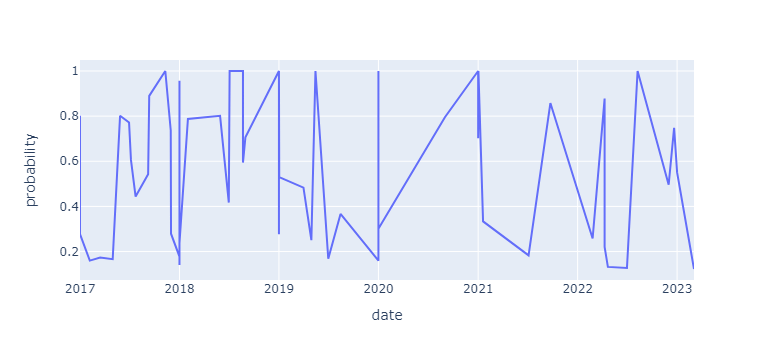

In [500]:
import plotly.express as px
fig = px.line(df_month_21, x='date', y = 'probability')
fig.show()